### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [148]:
df = pd.read_csv('telco_churn_data.csv')

In [149]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [150]:
df.shape

(7043, 46)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [152]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


We need a number which preserves the variance of the dataset to the highest degree:

In [153]:
object_columns = df.select_dtypes(include=['object']).columns
for i in object_columns:
    print(f'{i}:{df[i].unique()}')

Customer ID:['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Referred a Friend:['No' 'Yes']
Offer:['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Phone Service:['No' 'Yes']
Multiple Lines:['No' 'Yes']
Internet Service:['Yes' 'No']
Internet Type:['Fiber Optic' 'Cable' 'DSL' 'None']
Online Security:['No' 'Yes']
Online Backup:['No' 'Yes']
Device Protection Plan:['Yes' 'No']
Premium Tech Support:['No' 'Yes']
Streaming TV:['No' 'Yes']
Streaming Movies:['Yes' 'No']
Streaming Music:['No' 'Yes']
Unlimited Data:['No' 'Yes']
Contract:['Month-to-Month' 'One Year' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender:['Male' 'Female']
Under 30:['No' 'Yes']
Senior Citizen:['Yes' 'No']
Married:['No' 'Yes']
Dependents:['No' 'Yes']
City:['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
Churn Category:['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
Churn Reas

In [154]:
for i in object_columns:
    df[i].replace(df[i].unique(),list(range(len(df[i].unique()))),inplace=True)
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,0,0,0,1,0,0,0.00,0,0,0,...,34.023810,-118.156582,68701,1,5433,0.0,0,5,0,NaN
1,1,1,1,8,1,1,48.85,1,0,1,...,34.044271,-118.185237,55668,1,5302,0.0,1,5,0,NaN
2,2,0,0,18,2,1,11.33,1,0,0,...,34.108833,-118.229715,47534,1,3179,0.0,1,1,0,NaN
3,3,1,1,25,3,1,19.76,0,0,0,...,33.936291,-118.332639,27778,1,5337,1.0,2,1,1,2.0
4,4,1,1,37,3,1,6.33,1,0,1,...,33.972119,-118.020188,26265,1,2793,2.0,3,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,0,72,0,1,22.77,0,1,3,...,34.341737,-116.539416,2182,0,5306,5.0,19,0,0,NaN
7039,7039,1,1,24,3,1,36.05,1,0,2,...,34.667815,-117.536183,18980,0,2140,5.0,19,2,0,NaN
7040,7040,1,4,72,0,1,29.66,1,0,1,...,34.559882,-115.637164,42,0,5560,5.0,19,2,0,4.0
7041,7041,1,1,11,0,0,0.00,0,0,2,...,34.167800,-116.864330,301,0,2793,5.0,19,0,0,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   int64  
 1   Referred a Friend                  7043 non-null   int64  
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   int64  
 5   Phone Service                      7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   int64  
 8   Internet Service                   7043 non-null   int64  
 9   Internet Type                      7043 non-null   int64  
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   int64

In [156]:
df.describe()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,3521.000000,0.457476,1.951867,32.386767,1.299162,0.903166,22.958954,0.421837,0.216669,1.346585,...,36.197455,-119.756684,22139.603294,0.265370,4400.295755,4.039614,15.844668,1.338776,0.308107,3.005453
std,2033.283305,0.498224,3.001199,24.542061,1.736908,0.295752,15.448113,0.493888,0.412004,1.144798,...,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.783112,5.924739,1.430471,0.717514,1.256938
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1760.500000,0.000000,0.000000,9.000000,0.000000,1.000000,9.210000,0.000000,0.000000,0.000000,...,33.990646,-121.788090,2344.000000,0.000000,3469.000000,4.000000,16.000000,0.000000,0.000000,2.000000
50%,3521.000000,0.000000,0.000000,29.000000,0.000000,1.000000,22.890000,0.000000,0.000000,1.000000,...,36.205465,-119.595293,17554.000000,0.000000,4527.000000,5.000000,19.000000,1.000000,0.000000,3.000000
75%,5281.500000,1.000000,3.000000,55.000000,2.000000,1.000000,36.395000,1.000000,0.000000,2.000000,...,38.161321,-117.969795,36125.000000,1.000000,5380.500000,5.000000,19.000000,2.000000,0.000000,4.000000
max,7042.000000,1.000000,11.000000,72.000000,5.000000,1.000000,49.990000,1.000000,1.000000,3.000000,...,41.962127,-114.192901,105285.000000,1.000000,6500.000000,5.000000,20.000000,9.000000,6.000000,5.000000


First, we'll only analyze the non categorical columns:

In [157]:
df1=df.drop(columns=list(object_columns))

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-null   int64

In [158]:
for i in df1.columns:
    df1[i].fillna(value=df1[i].mean(), inplace=True)

In [159]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df1)
scaled.shape

(7043, 20)

In [160]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
reduced_data=pca.fit_transform(scaled)
reduced_data.shape

(7043, 10)

We need to find the number of dimensions that maximizes tthe variance in the data, so:

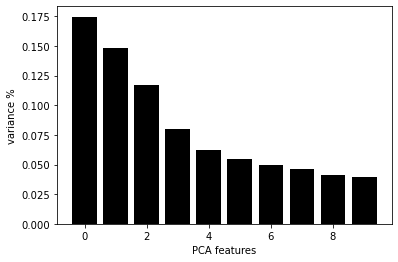

In [161]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
PCA_df=pd.DataFrame(reduced_data)

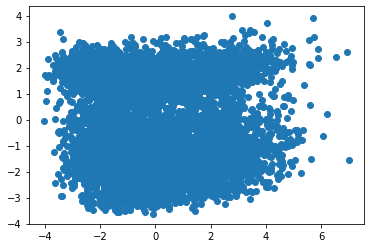

In [162]:
plt.scatter(PCA_df[0],PCA_df[1])

we can see that there are discernible clusters 

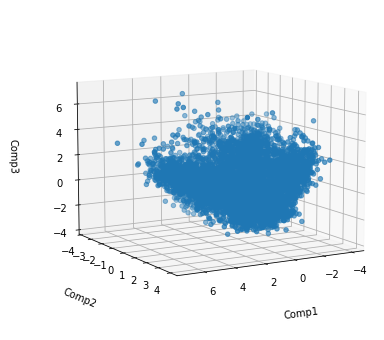

In [163]:
plt.figure(figsize=(6,6))
ax=plt.axes(projection='3d')
ax.scatter3D(PCA_df[0],PCA_df[1],PCA_df[2])  
ax.set_xlabel('Comp1', labelpad = 20)
ax.set_ylabel('Comp2',labelpad = 20)
ax.set_zlabel('Comp3',labelpad = 20)
ax.view_init(10, 60)

In [164]:
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,-3.002798,2.568436,0.435735,-0.998816,1.607802,0.901909,-0.503341,-0.857402,1.166325,1.585681
1,-1.568821,2.566579,1.360710,-1.384496,-0.872650,1.102183,0.015085,0.194377,1.155558,1.078244
2,-0.861567,2.371619,0.488412,1.242926,1.372669,1.079625,5.737100,0.826943,-0.353325,0.183389
3,-0.719786,2.132869,1.624001,-1.217324,1.356086,1.072161,1.160244,0.273082,-1.231701,-0.350140
4,-1.152766,1.944855,0.834273,-0.609254,1.597955,0.270291,-0.066083,2.060842,-1.163752,0.077246
...,...,...,...,...,...,...,...,...,...,...
7038,0.869339,1.025794,-1.851187,-0.876996,-0.113642,-0.330329,1.551243,-2.133172,-1.191048,-1.674934
7039,-0.087797,1.153038,-0.509277,0.514926,-0.583164,0.490409,6.223361,0.320231,-0.304054,-0.982371
7040,5.552551,2.150479,1.580899,2.959293,0.281390,0.426125,5.144912,-1.114288,0.907409,-2.173735
7041,-1.501072,0.724941,-2.323556,1.618127,0.650849,0.430918,3.104344,0.077345,-0.954009,-1.768319


In [165]:
import plotly.express as px
px.scatter_3d(data_frame=PCA_df, x = 0, y=1,z=2)

We'll use the elbow method to find the optimal number of clusters:

In [166]:
PCA_df.iloc[:,:3]

,0,1,2
0,-3.002798,2.568436,0.435735
1,-1.568821,2.566579,1.360710
2,-0.861567,2.371619,0.488412
3,-0.719786,2.132869,1.624001
4,-1.152766,1.944855,0.834273
...,...,...,...
7038,0.869339,1.025794,-1.851187
7039,-0.087797,1.153038,-0.509277
7040,5.552551,2.150479,1.580899
7041,-1.501072,0.724941,-2.323556


[5709.105603899089]
[5709.105603899089, 5708.541047641851]
[5709.105603899089, 5708.541047641851, 5708.782658930277]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135, 5708.822283386173]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135, 5708.822283386173, 5708.796750021083]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135, 5708.822283386173, 5708.796750021083, 5708.749756372484]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135, 5708.822283386173, 5708.796750021083, 5708.749756372484, 5709.300967922038]
[5709.105603899089, 5708.541047641851, 5708.782658930277, 5709.07609575194, 5708.500786915135, 5708.822283386173, 5708.796750021083, 5708.7497

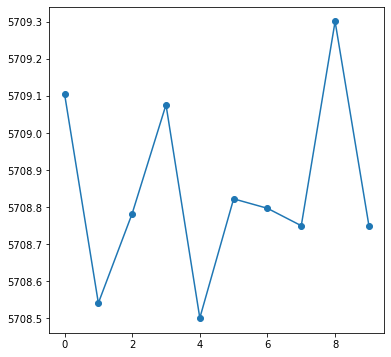

In [167]:
def Kmeans(df):
    inertias=[]
    for i in range(pca.n_components):
        kmeans=KMeans()
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)
        print(inertias)
    plt.figure(figsize=(6,6))
    plt.plot(range(pca.n_components),inertias,'o-')
    plt.show()
Kmeans(PCA_df.iloc[:,:2])

[5708.7335607261075]
[5708.7335607261075, 5708.650917044933]
[5708.7335607261075, 5708.650917044933, 5710.418005174987]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277, 5708.478906004013]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277, 5708.478906004013, 5709.049915945705]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277, 5708.478906004013, 5709.049915945705, 5709.366945808375]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277, 5708.478906004013, 5709.049915945705, 5709.366945808375, 5708.833673474323]
[5708.7335607261075, 5708.650917044933, 5710.418005174987, 5709.009651013699, 5708.782658930277, 5708.478906004013, 5709.049915

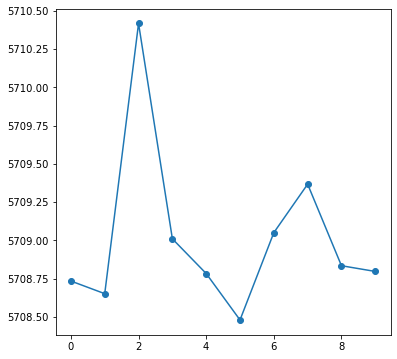

In [168]:
Kmeans(PCA_df.iloc[:,:2])

Since the results are wildly different, kmeans is not a viable algorithm for this task, we'll use DBSACN instead

Text(0, 0.5, '$x_2$')

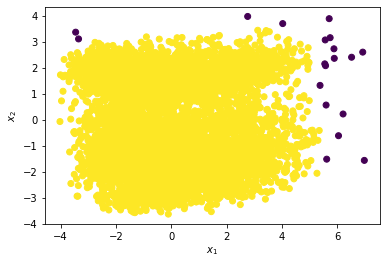

In [169]:
dbscan_cluster = DBSCAN()
dbscan_cluster.fit(PCA_df.iloc[:,:2])
plt.scatter(PCA_df[0], 
PCA_df[1], 
c=dbscan_cluster.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

We use nearest neighbors to find the optimal epsilon:

In [170]:
!pip install kneed

0.2529010193432564


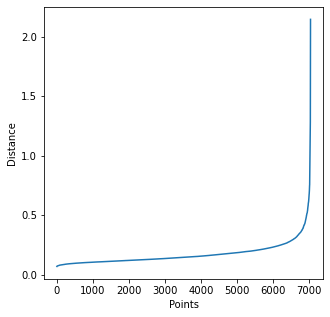

<Figure size 360x360 with 0 Axes>

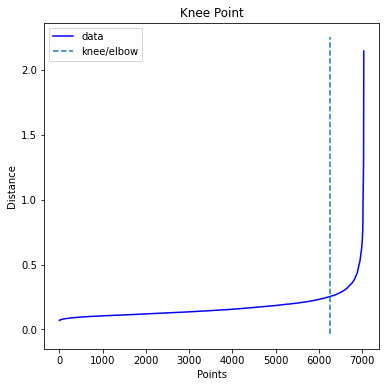

In [171]:
def finding_steep(min_point,new_df):
    from sklearn.neighbors import NearestNeighbors
    n_neighbors=NearestNeighbors(n_neighbors=min_point)
    neighbors = n_neighbors.fit(new_df.iloc[:,:2])
    distances, indices = neighbors.kneighbors(new_df.iloc[:,:2])
    distances = np.sort(distances[:,n_neighbors.n_neighbors-1], axis=0)
    fig = plt.figure(figsize=(5, 5))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    from kneed import KneeLocator
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    print(distances[knee.knee])
finding_steep(15,PCA_df)

In [172]:
dbscan_cluster = DBSCAN(eps=0.252,min_samples=12)
dbscan_cluster.fit(PCA_df.iloc[:,:2])

DBSCAN(eps=0.252, min_samples=12)

Text(0, 0.5, '$x_2$')

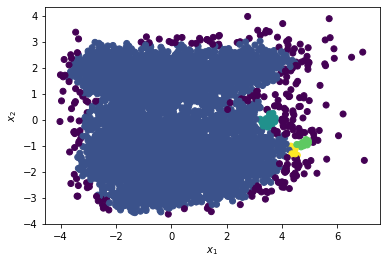

In [173]:
plt.scatter(PCA_df[0], 
PCA_df[1], 
c=dbscan_cluster.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Even the density clusters are inconclusive, to interpret the results, we'll take a number of clusters that minimizes inertia in both of the given Kmeans charts, that's 3:

In [174]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(PCA_df.iloc[:,:2])
kmeans.labels_.shape
centroids=kmeans.cluster_centers_

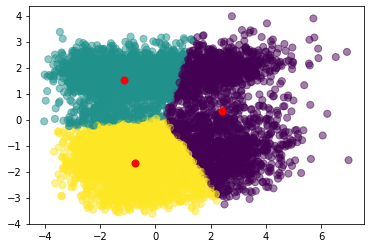

In [175]:
plt.scatter(PCA_df[0], PCA_df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Now, we include the categorical columns and do the analysis all over again:

In [176]:
for i in df.columns:
    df[i].fillna(value=df[i].mean(), inplace=True)
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,0,0,0,1,0,0,0.00,0,0,0,...,34.023810,-118.156582,68701,1,5433,0.0,0,5,0,3.005453
1,1,1,1,8,1,1,48.85,1,0,1,...,34.044271,-118.185237,55668,1,5302,0.0,1,5,0,3.005453
2,2,0,0,18,2,1,11.33,1,0,0,...,34.108833,-118.229715,47534,1,3179,0.0,1,1,0,3.005453
3,3,1,1,25,3,1,19.76,0,0,0,...,33.936291,-118.332639,27778,1,5337,1.0,2,1,1,2.000000
4,4,1,1,37,3,1,6.33,1,0,1,...,33.972119,-118.020188,26265,1,2793,2.0,3,1,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,0,72,0,1,22.77,0,1,3,...,34.341737,-116.539416,2182,0,5306,5.0,19,0,0,3.005453
7039,7039,1,1,24,3,1,36.05,1,0,2,...,34.667815,-117.536183,18980,0,2140,5.0,19,2,0,3.005453
7040,7040,1,4,72,0,1,29.66,1,0,1,...,34.559882,-115.637164,42,0,5560,5.0,19,2,0,4.000000
7041,7041,1,1,11,0,0,0.00,0,0,2,...,34.167800,-116.864330,301,0,2793,5.0,19,0,0,3.005453


In [177]:
df=df.drop(columns=['Customer ID'])

In [178]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)
scaled.shape

(7043, 45)

In [179]:
pca1=PCA(n_components=10)
reduced_data=pca1.fit_transform(scaled)
reduced_data.shape

(7043, 10)

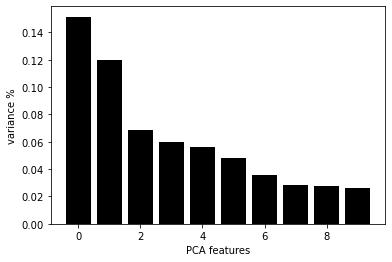

In [180]:
features = range(pca1.n_components_)
plt.bar(features, pca1.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
PCA_df1=pd.DataFrame(reduced_data)

This variance chart seems to be similar to the non categorical variance chart

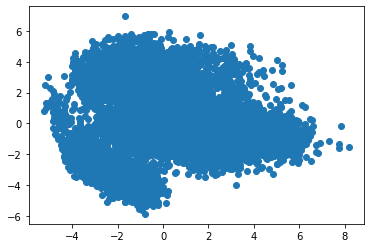

In [181]:
plt.scatter(PCA_df1[0],PCA_df1[1])

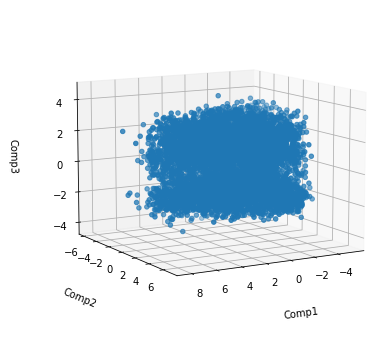

In [182]:
plt.figure(figsize=(6,6))
ax=plt.axes(projection='3d')
ax.scatter3D(PCA_df1[0],PCA_df1[1],PCA_df1[2])  
ax.set_xlabel('Comp1', labelpad = 20)
ax.set_ylabel('Comp2',labelpad = 20)
ax.set_zlabel('Comp3',labelpad = 20)
ax.view_init(10, 60)

In [183]:
import plotly.express as px
px.scatter_3d(data_frame=PCA_df1, x = 0, y=1,z=2)

[9951.670610377483]
[9951.670610377483, 9951.744680442811]
[9951.670610377483, 9951.744680442811, 9952.686480480128]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836, 9951.607090227864]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836, 9951.607090227864, 9951.420254509447]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836, 9951.607090227864, 9951.420254509447, 9951.7464976966]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836, 9951.607090227864, 9951.420254509447, 9951.7464976966, 9951.64052798351]
[9951.670610377483, 9951.744680442811, 9952.686480480128, 9950.427273574365, 9952.946643234836, 9951.607090227864, 9951.420254509447, 9951.74

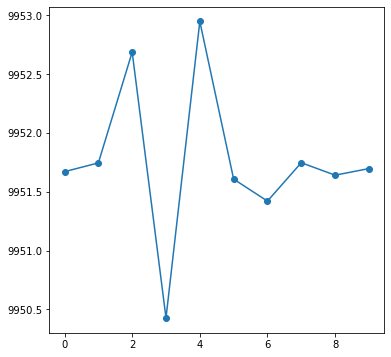

In [184]:
Kmeans(PCA_df1.iloc[:,:2])

[9952.125178233107]
[9952.125178233107, 9951.286905593493]
[9952.125178233107, 9951.286905593493, 9950.273180857155]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688, 9950.769722385452]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688, 9950.769722385452, 9950.700014427615]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688, 9950.769722385452, 9950.700014427615, 9951.56472043863]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688, 9950.769722385452, 9950.700014427615, 9951.56472043863, 9950.48269423742]
[9952.125178233107, 9951.286905593493, 9950.273180857155, 9951.38350088394, 9951.643417335688, 9950.769722385452, 9950.700014427615, 9951.5647204

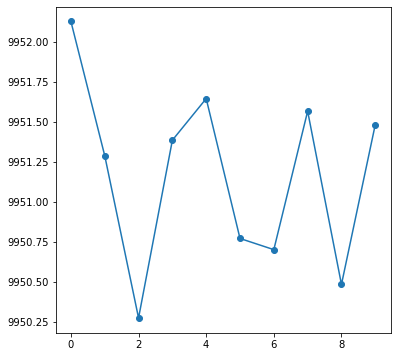

In [185]:
Kmeans(PCA_df1.iloc[:,:2])

In terms of Kmeans, 2 is the optimal number of clusters, we'll apply DBSCAN to the dataframe once to get a better representation:

Text(0, 0.5, '$x_2$')

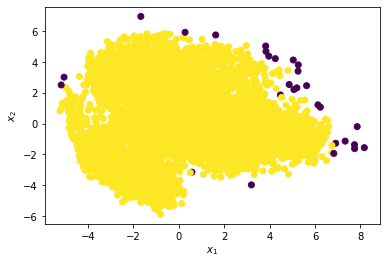

In [186]:
dbscan_cluster = DBSCAN()
dbscan_cluster.fit(PCA_df1.iloc[:,:2])
plt.scatter(PCA_df1[0], 
PCA_df1[1], 
c=dbscan_cluster.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

0.3246240969228478


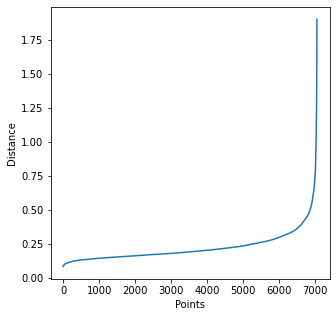

<Figure size 360x360 with 0 Axes>

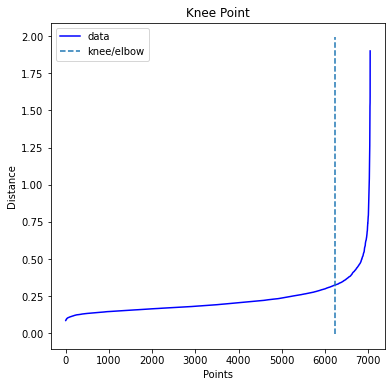

In [187]:
finding_steep(15,PCA_df1)

In [188]:
dbscan_cluster = DBSCAN(eps=0.324,min_samples=12)
dbscan_cluster.fit(PCA_df1.iloc[:,:2])

DBSCAN(eps=0.324, min_samples=12)

Text(0, 0.5, '$x_2$')

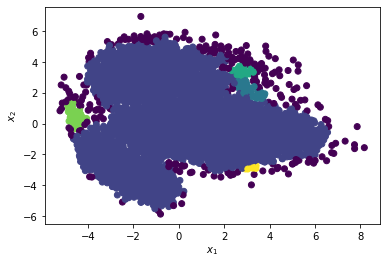

In [189]:
plt.scatter(PCA_df1[0], 
PCA_df1[1], 
c=dbscan_cluster.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

inconclusive results, we'll go for kmeans with 2 clusters

In [190]:
kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans.fit(PCA_df1.iloc[:,:2])
kmeans.labels_.shape
centroids=kmeans.cluster_centers_

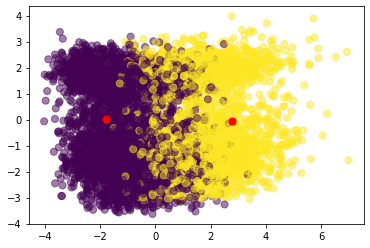

In [191]:
plt.scatter(PCA_df[0], PCA_df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()